Linear Regression for Spy Closing Price on Signal is used in this section to create a model to predict the SPY Closing Price based on the signals received.

Below code is from the data cleaning procedure, and will be used for further analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import datetime

filepath = "/Users/Ivan/Desktop/Cse 391 lectures/data.csv"
data = pd.read_csv(filepath)
print("Data Shape: ", data.shape, "\n")
print(data.info())
display(data.describe())
display(data.head())

# Eliminating Outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

df_outliers = data[((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
df = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

display(df_outliers)
display(df.describe())

#Graph 1.2: signal vs spy_close_price
df.plot(kind = 'scatter', x = 'signal', y = 'spy_close_price', rot = 70)
plt.xlabel("signal")
plt.ylabel("spy_close_price")
plt.title("Signal vs SP500 Index")
plt.show()

# Converting 'date' Data to Datetimes
df['date'] = df['date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

Data Shape:  (667, 3) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 3 columns):
date               667 non-null int64
signal             667 non-null float64
spy_close_price    667 non-null float64
dtypes: float64(2), int64(1)
memory usage: 15.7 KB
None


,date,signal,spy_close_price
count,6.670000e+02,667.000000,667.000000
mean,2.012939e+07,5.166603,163.169369
std,7.762422e+03,23.392818,39.210384
min,2.012010e+07,-3.802670,127.495000
25%,2.012083e+07,3.418083,140.880000
50%,2.013051e+07,3.893689,159.750000
75%,2.014010e+07,4.408313,181.500000
max,2.014083e+07,432.961165,710.310000


,date,signal,spy_close_price
0,20120103,3.107767,127.495
1,20120104,3.107282,127.700
2,20120105,3.099757,128.040
3,20120106,3.134223,127.710
4,20120109,3.135922,128.020


,date,signal,spy_close_price
303,20130326,-3.802670,156.1900
421,20130912,4.193204,618.9500
422,20130913,4.143689,619.3300
423,20130916,4.124515,710.3100
459,20131105,429.514563,176.2700
460,20131106,432.961165,177.1700
570,20140414,0.004560,182.9401
571,20140415,0.454976,184.2000
572,20140416,0.455898,186.1250


,date,signal,spy_close_price
count,6.580000e+02,658.000000,658.000000
mean,2.012933e+07,3.911967,160.824444
std,7.778235e+03,0.525500,21.488326
min,2.012010e+07,3.099757,127.495000
25%,2.012083e+07,3.419053,140.817500
50%,2.013050e+07,3.890291,159.245000
75%,2.013788e+07,4.409072,180.985000
max,2.014083e+07,4.881311,200.710000


<Figure size 640x480 with 1 Axes>

C:\Users\Ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn import datasets, linear_model
from sklearn.linear_model import Ridge
import seaborn as sns

A linear model is used to predict SPY Closing Price based on Signal. The model is trained using cross validation with 10 folds. 

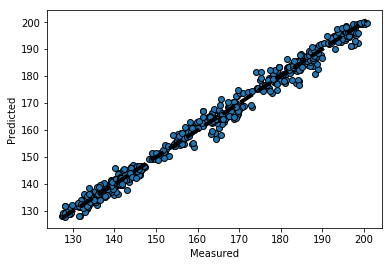

Mean squared error: 4.55
R-squared = : 0.99


In [3]:
x = df[['signal']]
y = df[['spy_close_price']]


lr = linear_model.LinearRegression()
predicted = cross_val_predict(lr, x, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()],[y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

print("Mean squared error: %.2f"% mean_squared_error(y, predicted))
print('R-squared = : %.2f' % r2_score(y, predicted))

The measured vs. predicted values are graphed along with the line of best fit. An R-Squared value of .99 was obtained, as well as a MSE of 4.55, showing the model was accurate.

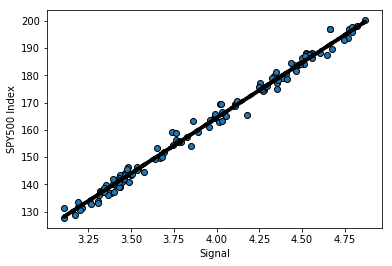

Mean squared error: 3.72
R-squared = : 0.99
[[40.61966788]]
[1.89742821]


In [4]:
x = df[['signal']]
y = df[['spy_close_price']]

x_train, x_test, y_train, y_test  = train_test_split(x,y, test_size = .2, random_state = 0)

model = linear_model.LinearRegression()

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

fig, ax = plt.subplots()
ax.scatter(x_test, y_test, edgecolors=(0, 0, 0))
ax.plot(x_test, y_pred, 'k--', lw=4)
ax.set_xlabel('Signal')
ax.set_ylabel('SPY500 Index')
plt.show()

print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
print('R-squared = : %.2f' % r2_score(y_test, y_pred))
print(model.coef_)
print(model.intercept_)

The predicted SPY Closing Price vs. tested Signal value line was. An R-Squared value of .99 was obtained, as well as a MSE of 3.72, showing the model was accurate in predicting SPY500 Index using Signal prices, and there is a significant relationship between the two.

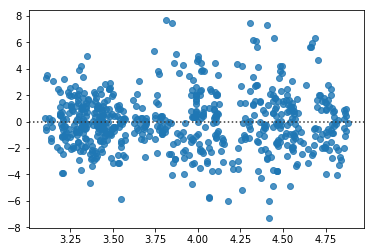

In [5]:
sns.residplot(x, y)
plt.show()

The Residual Plot was made. This supports that the model was accurate, as the residuals followed no pattern and were evenly distributed above and below 0.